# Overview of `pandas` and analysis of Titanic dataset

* How to work with `pandas`
    * Creation of tables and management of metadata
    * Processing of strings and dates
    * Susample selection and indexing
    * Saving and loading of tables

* Passangers analysis
    * Loading of data
    * Data preprocessing 
    * Machine learning models construction
    * Feature selection

<br>

# Other tutorials for `pandas`

Short intro to `pandas`
[10 Minutes to pandas (англ.)](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

Pandas cookbook [Cookbook (англ.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)

In [0]:
import pandas as pd

Pandas can create tables of sequences of records

In [0]:
records = [
    [ 1,  "1000001",  0.04,  "2014-04-20 16:20",       1,    "Короткое предложение из пяти слов."],
    [ 5,  "1011010",  0.76,  "2014-03-02 23:59",  "мусор",             "Пи примерно 355 / 113"],
    [ 3,  "1010001",  0.14,  "2014-05-01 12:03",    None,                               None],
    [ 4,  "1010001",  0.14,  "2019-04-20 16:20",      "",                "Соотношение 13 / 45"]
]

In [0]:
pd.DataFrame(records)

,0,1,2,3,4,5
0,1,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.
1,5,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113
2,3,1010001,0.14,2014-05-01 12:03,None,None
3,4,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45


Also we can a dict

In [0]:
dict_records = {
    "Номер": [1, 5, 3, 4],
    "Код": ['1000001', '1011010', '1010001', '1010001'],
    "Метрика": [0.04, 0.76, 0.14, 0.14],
    "Lfnf": ["2014-04-20 16:20", "2014-03-02 23:59", "2014-05-01 12:03", "2019-04-20 16:20"],
    "Ненужное": [1, 'мусор', None, ''],
    "Текст": ['Короткое предложение из пяти слов.', 'Пи примерно 355 / 113', None, 'Соотношение 13 / 45']
}

In [0]:
pd.DataFrame(dict_records)

,Номер,Код,Метрика,Lfnf,Ненужное,Текст
0,1,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.
1,5,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113
2,3,1010001,0.14,2014-05-01 12:03,None,None
3,4,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45


We can specify column names

In [0]:
df = pd.DataFrame(records, columns=['Number', 'Code', 'Metric', 'Lfnf', 'Unused', 'Text'])

In [0]:
df

,Number,Code,Metric,Lfnf,Unused,Text
0,1,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.
1,5,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113
2,3,1010001,0.14,2014-05-01 12:03,None,None
3,4,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45


And data type for each field

In [0]:
df.dtypes

Number      int64
Code       object
Metric    float64
Lfnf       object
Unused     object
Text       object
dtype: object

* `int64` -- integer $1,\,2,\,3,\,\ldots,\,42,\,\ldots$
* `float64` -- float $1.01,\,3.1415,\,9.9999,\,\ldots$
* `object` -- string

column names

In [0]:
df.columns

Index(['Number', 'Code', 'Metric', 'Lfnf', 'Unused', 'Text'], dtype='object')

<br>

We can select one column:

In [0]:
df["Metric"]

0    0.04
1    0.76
2    0.14
3    0.14
Name: Metric, dtype: float64

... or a subset of columns

In [0]:
df[["Text", "Code"]]

,Text,Code
0,Короткое предложение из пяти слов.,1000001
1,Пи примерно 355 / 113,1011010
2,None,1010001
3,Соотношение 13 / 45,1010001


We can get mask for missed values for one field or for the whole table

In [0]:
df["Unused"].isnull()

0    False
1    False
2     True
3    False
Name: Unused, dtype: bool

In [0]:
df.isnull()

,Number,Code,Metric,Lfnf,Unused,Text
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,True
3,False,False,False,False,False,False


Sum function is here

In [0]:
df["Number"].sum()

13

In [0]:
df[["Number", "Metric"]].sum()

Number    13.00
Metric     1.08
dtype: float64

Another function calculates number of occurences for each value

In [0]:
df["Metric"].value_counts()

0.14    2
0.04    1
0.76    1
Name: Metric, dtype: int64

Sorting is easy 

In [0]:
df.sort_values(by="Metric")

,Number,Code,Metric,Lfnf,Unused,Text
0,1,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.
2,3,1010001,0.14,2014-05-01 12:03,None,None
3,4,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45
1,5,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113


We can rename columns

In [0]:
df = df.rename(columns={
    "Lfnf": "String"
})

df

,Number,Code,Metric,String,Unused,Text
0,1,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.
1,5,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113
2,3,1010001,0.14,2014-05-01 12:03,None,None
3,4,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45


<br>

Or add another column

...with e.g. a constant value

In [0]:
df["Constant column"] = "literally anything"

df

,Number,Code,Metric,String,Unused,Text,Constant column
0,1,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.,literally anything
1,5,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113,literally anything
2,3,1010001,0.14,2014-05-01 12:03,None,None,literally anything
3,4,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45,literally anything


... or evaluation result

In [0]:
df["Number"] = df["Metric"] * df["Number"] ** 2

df

,Number,Code,Metric,String,Unused,Text,Constant column
0,0.04,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.,literally anything
1,19.00,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113,literally anything
2,1.26,1010001,0.14,2014-05-01 12:03,None,None,literally anything
3,2.24,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45,literally anything


... или вычислениями сложной бизнес-логики

In [0]:
def business_logic(row):
    if row["Code"] == "A":
        return row["Metric"]

    return -10 * row["Metric"]

df["Evaluated field"] = df.apply(business_logic, axis=1)

df

,Number,Code,Metric,String,Unused,Text,Constant column,Evaluated field
0,0.04,1000001,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.,literally anything,-0.4
1,19.00,1011010,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113,literally anything,-7.6
2,1.26,1010001,0.14,2014-05-01 12:03,None,None,literally anything,-1.4
3,2.24,1010001,0.14,2019-04-20 16:20,,Соотношение 13 / 45,literally anything,-1.4


We can change values in data

In [0]:
df = df.replace({
    "Code": {
        '1000001': 'A',
        '1011010': 'Z',
        '1010001': 'Q',
        '1000110': 'F'
    },  # the data type can be different
})

df

,Number,Code,Metric,String,Unused,Text,Constant column,Evaluated field
0,0.04,A,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.,literally anything,-0.4
1,19.00,Z,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113,literally anything,-7.6
2,1.26,Q,0.14,2014-05-01 12:03,None,None,literally anything,-1.4
3,2.24,Q,0.14,2019-04-20 16:20,,Соотношение 13 / 45,literally anything,-1.4


... or rewrite all fields alltogether

In [0]:
df["Number"] = [1, 5, 3, 4]

df

,Number,Code,Metric,String,Unused,Text,Constant column,Evaluated field
0,1,A,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.,literally anything,-0.4
1,5,Z,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113,literally anything,-7.6
2,3,Q,0.14,2014-05-01 12:03,None,None,literally anything,-1.4
3,4,Q,0.14,2019-04-20 16:20,,Соотношение 13 / 45,literally anything,-1.4


<br>

To copy and backup table there is also a function

In [0]:
df_backup = df.copy()

... or we can drop something we don't need

In [0]:
df = df.drop(columns=["Code", "Unused", "Constant column", "Evaluated field"])

df

,Number,Metric,String,Text
0,1,0.04,2014-04-20 16:20,Короткое предложение из пяти слов.
1,5,0.76,2014-03-02 23:59,Пи примерно 355 / 113
2,3,0.14,2014-05-01 12:03,None
3,4,0.14,2019-04-20 16:20,Соотношение 13 / 45


In [0]:
df_backup

,Number,Code,Metric,String,Unused,Text,Constant column,Evaluated field
0,1,A,0.04,2014-04-20 16:20,1,Короткое предложение из пяти слов.,literally anything,-0.4
1,5,Z,0.76,2014-03-02 23:59,мусор,Пи примерно 355 / 113,literally anything,-7.6
2,3,Q,0.14,2014-05-01 12:03,None,None,literally anything,-1.4
3,4,Q,0.14,2019-04-20 16:20,,Соотношение 13 / 45,literally anything,-1.4


<br>

In `pandas` there is a good processing of strings and text using method `.str`

Extract the first $5$ symbols

In [0]:
df["Text"].str[:5]

0    Корот
1    Пи пр
2     None
3    Соотн
Name: Text, dtype: object

Get masc with letters `пят`

In [0]:
df["Text"].str.contains("пят")

0     True
1    False
2     None
3    False
Name: Text, dtype: object

Use regular expressions to find fractions in text
<!-- (?P<numerator>[0-9-]+) / (?P<denumerator>[0-9:]+) -->

In [0]:
frac = df["Text"].str.extract("([0-9-]+) / ([0-9:]+)")

frac

,0,1
0,NaN,NaN
1,355,113
2,NaN,NaN
3,13,45


Then we can get numbers and use them as expected!

In [0]:
frac = frac.apply(pd.to_numeric)

df["Ratio"] = frac[0] / frac[1]

In [0]:
df

,Number,Metric,String,Text,Ratio
0,1,0.04,2014-04-20 16:20,Короткое предложение из пяти слов.,NaN
1,5,0.76,2014-03-02 23:59,Пи примерно 355 / 113,3.141593
2,3,0.14,2014-05-01 12:03,None,NaN
3,4,0.14,2019-04-20 16:20,Соотношение 13 / 45,0.288889


<br>

In `pandas` we can work with time series (`.dt`)

We start with defintion of the correct type for datetime columns

In [0]:
df["Date"] = pd.to_datetime(df["String"])

In [0]:
df

,Number,Metric,String,Text,Ratio,Date
0,1,0.04,2014-04-20 16:20,Короткое предложение из пяти слов.,NaN,2014-04-20 16:20:00
1,5,0.76,2014-03-02 23:59,Пи примерно 355 / 113,3.141593,2014-03-02 23:59:00
2,3,0.14,2014-05-01 12:03,None,NaN,2014-05-01 12:03:00
3,4,0.14,2019-04-20 16:20,Соотношение 13 / 45,0.288889,2019-04-20 16:20:00


In [0]:
df.dtypes

Number             int64
Metric           float64
String            object
Text              object
Ratio            float64
Date      datetime64[ns]
dtype: object

Year extraction is an easy thing to do

In [1]:
df["String"].dt.year

NameError: ignored

... the same thing with week number in an year

In [0]:
df["Date"].dt.week

0    16
1     9
2    18
3    16
Name: Date, dtype: int64

... number or name fo a weekday

In [0]:
df["Date"].dt.weekday

0    6
1    6
2    3
3    5
Name: Date, dtype: int64

In [0]:
df["Date"].dt.day_name()

0      Sunday
1      Sunday
2    Thursday
3    Saturday
Name: Date, dtype: object

... and time

In [0]:
df["Date"].dt.time

0    16:20:00
1    23:59:00
2    12:03:00
3    16:20:00
Name: Date, dtype: object

<br>

## Indexing

Delete fields we don't need

In [0]:
df = df.drop(columns=["String", "Text"])

df

,Number,Metric,Ratio,Date
0,1,0.04,NaN,2014-04-20 16:20:00
1,5,0.76,3.141593,2014-03-02 23:59:00
2,3,0.14,NaN,2014-05-01 12:03:00
3,4,0.14,0.288889,2019-04-20 16:20:00


By definition the table has simple integer index

In [0]:
df.index

RangeIndex(start=0, stop=4, step=1)

We can use another index instead and sort by this index

In [0]:
dd = df.set_index("Date")

dd = dd.sort_index()

dd

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,5,0.76,3.141593
2014-04-20 16:20:00,1,0.04,NaN
2014-05-01 12:03:00,3,0.14,NaN
2019-04-20 16:20:00,4,0.14,0.288889


To extract a part of the data there are a number of methods
* `[]` -- mask or interval $[a, b)$ for rows of the table for the current order of rows of the table
* `.iloc` -- one, list of interval $[a, b)$ **use ordered indexing** for a field (from $0$ to $n - 1$)
* `.loc` -- one, list or interval $[a, b]$ **use indexes**

In [0]:
dd[dd["Metric"] <= 0.14]

,Number,Metric,Ratio
Date,,,
2014-04-20 16:20:00,1,0.04,NaN
2014-05-01 12:03:00,3,0.14,NaN
2019-04-20 16:20:00,4,0.14,0.288889


In [0]:
dd[1:3]

,Number,Metric,Ratio
Date,,,
2014-04-20 16:20:00,1,0.04,NaN
2014-05-01 12:03:00,3,0.14,NaN


In [0]:
dd.iloc[1]

Number    1.00
Metric    0.04
Ratio      NaN
Name: 2014-04-20 16:20:00, dtype: float64

In [0]:
dd.iloc[[1, 2, 0]]

,Number,Metric,Ratio
Date,,,
2014-04-20 16:20:00,1,0.04,NaN
2014-05-01 12:03:00,3,0.14,NaN
2014-03-02 23:59:00,5,0.76,3.141593


for `.loc` we need the exact match for requested index

In [0]:
dd.loc[pd.Timestamp('2014-03-02 23:59')]

Number    5.000000
Metric    0.760000
Ratio     3.141593
Name: 2014-03-02 23:59:00, dtype: float64

In [0]:
dd.loc[pd.Timestamp('2014-03-02 23:59'):pd.Timestamp('2014-03-03')]

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,5,0.76,3.141593


In [0]:
dd.loc[[pd.Timestamp('2014-03-02 23:59'),
        pd.Timestamp('2014-05-01 12:03')]]

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,5,0.76,3.141593
2014-05-01 12:03:00,3,0.14,NaN


A single cell change is also possible

In [0]:
dd.iloc[1, 0] = 99

In [0]:
dd.loc[pd.Timestamp('2014-03-02 23:59'), "Number"] = -11

In [0]:
dd.loc[dd["Metric"] <= 0.14, "Number"]

Date
2014-04-20 16:20:00    99
2014-05-01 12:03:00     3
2019-04-20 16:20:00     4
Name: Number, dtype: int64

In [0]:
dd.loc[dd["Metric"] <= 0.14, "Number"] = 333

In [0]:
dd

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,-11,0.76,3.141593
2014-04-20 16:20:00,333,0.04,NaN
2014-05-01 12:03:00,333,0.14,NaN
2019-04-20 16:20:00,333,0.14,0.288889


For calendar index using `.loc` we can select intervals

In [0]:
dd.loc["2013":"2015"]

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,-11,0.76,3.141593
2014-04-20 16:20:00,333,0.04,NaN
2014-05-01 12:03:00,333,0.14,NaN


In [0]:
dd.loc["2014-01":"2014-04-19"]

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,-11,0.76,3.141593


In [0]:
dd.loc["2014-01":"2014-04-20"]

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,-11,0.76,3.141593
2014-04-20 16:20:00,333,0.04,NaN


In [0]:
dd.loc["2014-01":"2014-04-20 23:59"]

,Number,Metric,Ratio
Date,,,
2014-03-02 23:59:00,-11,0.76,3.141593
2014-04-20 16:20:00,333,0.04,NaN


<br>

## Saving and loading of tables

Using functions `.to_*` we can save in any desired format
* `.to_csv` -- text files with defined separators (e.g. comma) **CSV**
* `.to_excel` -- Microsoft **Excel** workbook
* `.to_json` -- **JSON** format
* and others

In [0]:
dd.to_csv("table_with_results.csv")

To _Excel_ table with a new sheet name

In [0]:
dd.to_excel("table_with_results.xlsx", sheet_name="Лист с результатами")

To $\LaTeX$

In [0]:
print(dd.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Number &  Metric &     Ratio \\
Date                &         &         &           \\
\midrule
2014-03-02 23:59:00 &     -11 &    0.76 &  3.141593 \\
2014-04-20 16:20:00 &     333 &    0.04 &       NaN \\
2014-05-01 12:03:00 &     333 &    0.14 &       NaN \\
2019-04-20 16:20:00 &     333 &    0.14 &  0.288889 \\
\bottomrule
\end{tabular}



Using `pd.read_*` we can read files with the following types:
* `pd.read_csv` -- text files with delimiters (e.g. comma) **CSV**
* `pd.read_excel` -- **Excel** workbooks
* `pd.read_html` -- **HTML** tables from web-pages
* `pd.read_sql_query` -- **SQL** queries from data bases
* and other storages

From a text file with delimiter:

In [0]:
pd.read_csv("table_with_results.csv")

,Date,Number,Metric,Ratio
0,2014-03-02 23:59:00,-11,0.76,3.141593
1,2014-04-20 16:20:00,333,0.04,NaN
2,2014-05-01 12:03:00,333,0.14,NaN
3,2019-04-20 16:20:00,333,0.14,0.288889


Load all sheets from **Excel** book (one list is one table)

In [0]:
book = pd.read_excel("table_with_results.xlsx", sheet_name=None)

<br>

## Let's dive into real data using `pandas`

In this section we consider exploratory data analyis and data preprocessing.

* Data are from the toy [kaggle](https://www.kaggle.com/c/titanic) competition
* The goal of the competition is to construct a model that predicts whether a Titanic passenger will survive or not.
* These data contain many problems often encountered in real projects.

Tools for data processing

In [0]:
import numpy as np

import pandas as pd

Tools for data visualization

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

## Load passengers data

The data are in a **csv** file.

In [0]:
dataset_original = pd.read_csv("https://drive.google.com/uc?id=1Tb63anYEk8P1KktDfe7Shgq2AfYuSCx1", index_col="PassengerId")

dataset = dataset_original.copy()

Columns in the data are the following

| Column name | Description | Details |
| ------------- |:-------------|: -----|
| PassengerId | ID of a passenger |   | 
| Survived    | Survived?                                     | 0 = No, 1 = Yes | 
| Pclass      | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name        | Full name                       | Surname, title / Name  | 
| Sex         | Sex                                        | |
| Age         | Age in yeras                            | |
| SibSp       | Number of siblings on board | |
| Parch       | Number of parents and children on board          | |
| Ticket      | Ticket ID                               | |
| Fare        | Ticket price                                | |
| Cabin       | Cabin number                                | |
| Embarked    | Embarking port                               | C = Cherbourg, Q = Queenstown, S = Southampton |

First $7$ rows.

In [0]:
dataset.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


_Four_ random rows.

In [0]:
dataset.sample(n=4, random_state=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q


Examine data types in the table

In [0]:
dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Identify number of missing values in each column
* `.isna()` -- mask of missing values
* `.sum(axis=0)` -- sum for mask for each column

In [0]:
dataset.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<br> <!-- Эта ячейка умышленно пуста -->

### Processing of "Emarked" column

Consider simple filling of NA values for `Embarked` column

In [0]:
dataset["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Use the most common value in the sample

In [0]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

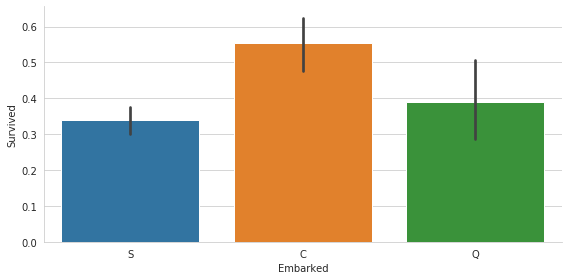

In [0]:
sns.catplot('Embarked', 'Survived', data=dataset,
            height=4, aspect=2, kind="bar");

<br> <!-- Эта ячейка умышленно пуста -->

### Processing of feature "full passenger name"

We can proceed some strings

In [0]:
fullname = dataset["Name"]

Names have titles. They can be usefull
* The full passenger name has the form `surname [, ] title / обращение name`:

In [0]:
fullname.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

The title in full name is word with a dot "." in the end.

In [0]:
titles = fullname.str.extract(r" ([A-za-z]+)\.", expand=False)

titles.head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Name, dtype: object

We can look at the number of occurences

In [0]:
titles.value_counts(dropna=False)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Mme           1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Don           1
Ms            1
Name: Name, dtype: int64

We start with the general abbrevations, then rare titles to `Other`, then add this feature to the data table.

In [0]:
titles = titles.replace({"Mlle": "Miss", "Ms": "Miss"})

rare_titles = ["Dr", "Rev", "Col", "Major", "Capt", "Jonkheer",
               "Mme", "Lady", "Sir", "Countess", "Don"]
titles = titles.replace(rare_titles, "Other")

dataset["Title"] = titles

In [0]:
titles.value_counts(dropna=False)

Mr        517
Miss      185
Mrs       125
Master     40
Other      24
Name: Name, dtype: int64

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

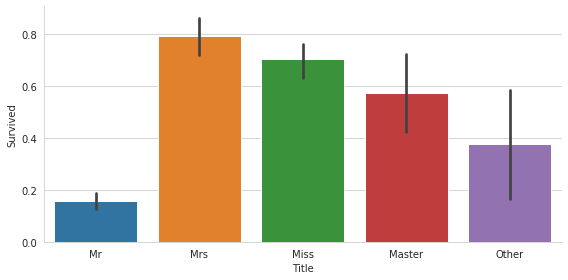

In [0]:
sns.catplot('Title', 'Survived', data=dataset,
            height=4, aspect=2, kind="bar")

<br> <!-- Эта ячейка умышленно пуста -->

### Exercise: processing of the feature "cabin number"

In the field `Cabin` there are many missing values

In [0]:
dataset["Cabin"].isnull().sum(axis=0)

687

But the cabin number can be connected to the deck number, so it can affect the survival probability.

#### Exercise

1. Select the first letters for the number of cabin
2. Calcuate frequences of number of letters
3. Replace rare with $\leq 14$ letters with `R`, and missing values with `U`
4. Put obtained values to a new column `Deck` in the data table

In [0]:
### YOUR SOLUTION HERE

#### Solution

In [0]:
deck = dataset["Cabin"].str[:1]

counts = deck.value_counts()

In [0]:
counts

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [0]:
deck = deck.replace(["F", "G", "T"], "R")

deck = deck.fillna("U")

dataset["Deck"] = deck

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

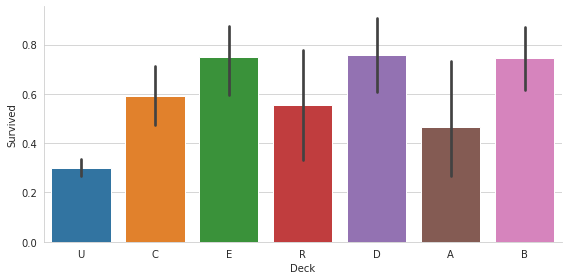

In [0]:
sns.catplot('Deck', 'Survived', data=dataset,
            height=4, aspect=2, kind="bar")

<br> <!-- Эта ячейка умышленно пуста -->

### Process features connected to the marital status

Create a feature if there were other family members on board

In [0]:
total_family = dataset["Parch"] + dataset["SibSp"]

dataset["hasFamily"] = np.where(total_family > 0, 1, 0)

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

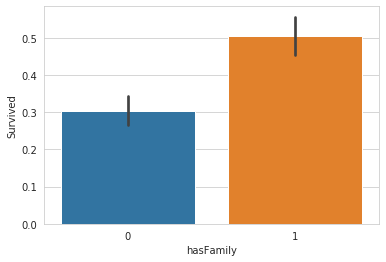

In [0]:
sns.barplot(x='hasFamily', y='Survived', data=dataset);

<br> <!-- Эта ячейка умышленно пуста -->

### Proccessing of "Age" feature

The column `Age` has missing values

In [0]:
dataset["Age"].isnull().sum()

177

In [0]:
dataset["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Let us draw histogram of ages with median and interquantile range

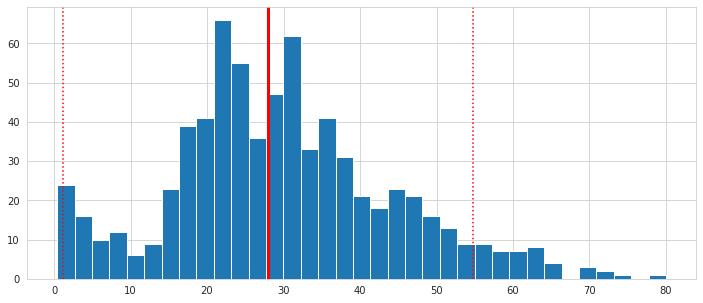

In [0]:
age_center = dataset["Age"].median()
age_scale = dataset["Age"].quantile(0.75) - dataset["Age"].quantile(0.25)

dataset["Age"].hist(bins=35, figsize=(12, 5))

plt.gca().axvline(age_center, c="red", linewidth=3)
plt.gca().axvline(age_center + 1.5 * age_scale, c="red", linestyle=":")
plt.gca().axvline(age_center - 1.5 * age_scale, c="red", linestyle=":");

Fill missing values with random values from the available range

In [0]:
uniform_age = np.random.uniform(age_center - 1.5 * age_scale,
                                age_center + 1.5 * age_scale,
                                size=len(dataset))

#### Exercise

1. Create the mask of missing values for the age
2. Fill missing values with random variable, that are rounded to `tenth`

In [0]:
### YOUR SOLUTION HERE

#### Solution

In [0]:
mask = dataset["Age"].isnull()

dataset.loc[mask, "Age"] = uniform_age[mask].round(1)

<br> <!-- Эта ячейка умышленно пуста -->

Compare smoothed distributions

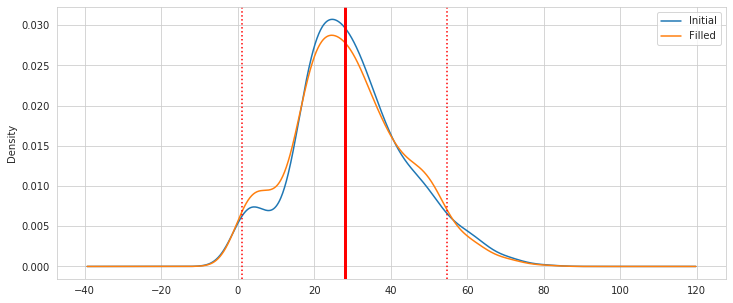

In [0]:
dataset_original["Age"].plot(kind="kde", label="Initial", figsize=(12, 5))
dataset["Age"].plot(kind="kde", label="Filled")

ax = plt.gca()
ax.axvline(age_center, c="red", linewidth=3)
ax.axvline(age_center + 1.5 * age_scale, c="red", linestyle=":")
ax.axvline(age_center - 1.5 * age_scale, c="red", linestyle=":")
ax.legend();

Consider density in groups `survived / died`.

It will allow us to find out if age is a useful feature

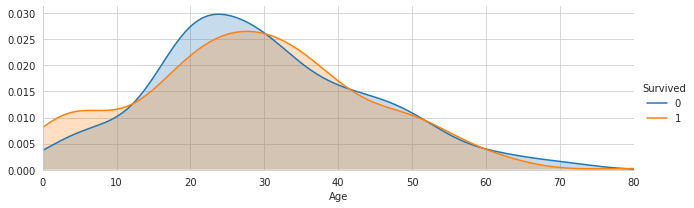

In [0]:
facet = sns.FacetGrid(dataset, hue="Survived", aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True)

facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend();

<br> <!-- Эта ячейка умышленно пуста -->

### Exercise: process feature "Sex"

1. Create a function that identifies if a passenger is a child or not
```python
def is_child(row):
       return """Return "child" if Age < 16, otherwise use Sex column value"""
```
2. Process the data table with the function `is_child()` using `.apply(..., axis=1)`
3. Write the results to a new column `Person`

In [0]:
### YOUR SOLUTION HERE

#### Solution

In [0]:
def is_child(row):
    """Child is a passenger witrh age smaller than 16 лет, otherwise return sex"""
    return "child" if row["Age"] < 16 else row["Sex"]

dataset["Person"] = dataset.apply(is_child, axis=1)

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

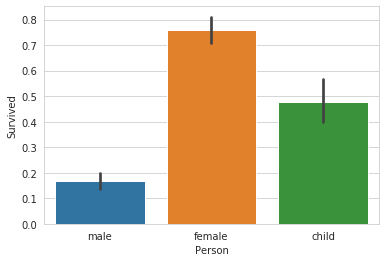

In [0]:
sns.barplot(x='Person', y='Survived', data=dataset)

<br> <!-- Эта ячейка умышленно пуста -->

### Categorization for numerical feature "Age"

Number of possible values can be obtained by groups of values

In [0]:
dataset["Age"].value_counts(bins=4, sort=False)

(0.339, 20.315]    244
(20.315, 40.21]    455
(40.21, 60.105]    170
(60.105, 80.0]      22
Name: Age, dtype: int64

We create uniform cohorts. The function `pd.cut` split the series to intervals and returns the category.

* Obtain the numerical code for a cohort: 
```python
age_cohort.cat.codes
```

In [0]:
age_cohort = pd.cut(dataset["Age"], bins=4, precision=1)

age_cohort.head()

PassengerId
1    (20.3, 40.2]
2    (20.3, 40.2]
3    (20.3, 40.2]
4    (20.3, 40.2]
5    (20.3, 40.2]
Name: Age, dtype: category
Categories (4, interval[float64]): [(0.3, 20.3] < (20.3, 40.2] < (40.2, 60.1] < (60.1, 80.0]]

Add another feature for the age cohort and find out the correlation of it and survival probability

In [0]:
dataset["AgeCohort"] = age_cohort

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

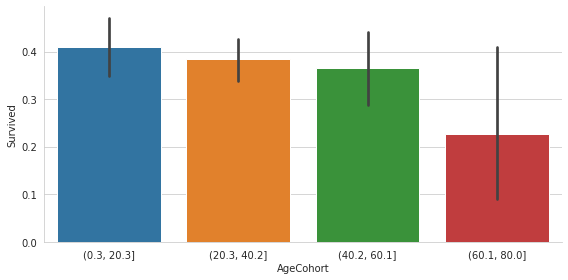

In [0]:
sns.catplot('AgeCohort', 'Survived', data=dataset,
            height=4, aspect=2, kind="bar");

<br> <!-- Эта ячейка умышленно пуста -->

### Exercise: work with feature "ticket price"

Look at hist for cost distribution

In [0]:
dataset["Fare"].value_counts(bins=10, sort=False)

(-0.513, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
Name: Fare, dtype: int64

#### Exercise

1. Get new values from `dataset["Fare"]` using formula $f(x) = \log(1 + x)$
2. Using `pd.cut` split the value to 3 groups
3. Add result as a column `LogFareCategory` 

In [0]:
### YOUR SOLUTION HERE

#### Solution

In [0]:
log_fare = np.log(1 + dataset["Fare"])

dataset["LogFareCategory"] = pd.cut(log_fare, bins=3)

<br> <!-- Эта ячейка умышленно пуста -->

See if there is any meaningful interpretation of this column

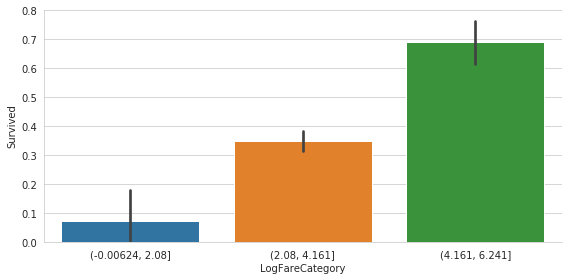

In [0]:
sns.catplot('LogFareCategory', 'Survived', data=dataset,
            height=4, aspect=2, kind="bar")

<br> <!-- Эта ячейка умышленно пуста -->

### Dropping of columns and categorization and binarization of categorial features

Up to this moment we have added many features to our data table. It is too large now.

In [0]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,hasFamily,Person,AgeCohort,LogFareCategory
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,U,1,male,"(20.3, 40.2]","(2.08, 4.161]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,female,"(20.3, 40.2]","(4.161, 6.241]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,U,0,female,"(20.3, 40.2]","(2.08, 4.161]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,female,"(20.3, 40.2]","(2.08, 4.161]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,U,0,male,"(20.3, 40.2]","(2.08, 4.161]"


We no longer need some columns

In [0]:
dataset = dataset.drop(columns=[
    "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin"
])

In [0]:
dataset.head()

,Survived,Pclass,Embarked,Title,Deck,hasFamily,Person,AgeCohort,LogFareCategory
PassengerId,,,,,,,,,
1,0,3,S,Mr,U,1,male,"(20.3, 40.2]","(2.08, 4.161]"
2,1,1,C,Mrs,C,1,female,"(20.3, 40.2]","(4.161, 6.241]"
3,1,3,S,Miss,U,0,female,"(20.3, 40.2]","(2.08, 4.161]"
4,1,1,S,Mrs,C,1,female,"(20.3, 40.2]","(2.08, 4.161]"
5,0,3,S,Mr,U,0,male,"(20.3, 40.2]","(2.08, 4.161]"


In [0]:
dataset.dtypes

Survived              int64
Pclass                int64
Embarked             object
Title                object
Deck                 object
hasFamily             int64
Person               object
AgeCohort          category
LogFareCategory    category
dtype: object

Replace all categorical features with binary
* `pd.get_dummies()` does this job for us (add new and delete old)

In [0]:
dataset = pd.get_dummies(dataset, columns=[
    "Pclass", "Deck", "Embarked", "Title",
    "AgeCohort", "LogFareCategory", "Person"
])

Make a copy of the data just in case

In [0]:
dataset_ready = dataset.copy()

In [0]:
dataset.head(5).T

PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
hasFamily,1,1,0,1,0
Pclass_1,0,1,0,1,0
Pclass_2,0,0,0,0,0
Pclass_3,1,0,1,0,1
Deck_A,0,0,0,0,0
Deck_B,0,0,0,0,0
Deck_C,0,1,0,1,0
Deck_D,0,0,0,0,0
Deck_E,0,0,0,0,0


<br> <!-- Эта ячейка умышленно пуста -->

## Construct Machine Learning models

Split input features and target variable

In [0]:
features, target = dataset.drop(columns="Survived"), dataset["Survived"]

Split the sample to the training and test samples

In [0]:
from sklearn.model_selection import train_test_split

split = train_test_split(features, target, test_size=0.50,
                         stratify=target, random_state=502266368)

X_train, X_holdout, y_train, y_holdout = split

Create list of models

In [0]:
models = []

Random classifier

In [0]:
from sklearn.dummy import DummyClassifier


models.append(("Baseline", DummyClassifier(random_state=391488407)))

Support vector machine

In [0]:
from sklearn.svm import SVC


models.append(("Support vector (C=1.00)", SVC(C=1.00, gamma="scale")))
models.append(("Support vector (C=0.25)", SVC(C=0.25, gamma="scale")))
models.append(("Support vector (C=4.00)", SVC(C=4.00, gamma="scale")))

Random forest ensemble

In [0]:
from sklearn.ensemble import RandomForestClassifier


models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=1283220422)))

Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression


models.append(("Logistic Regression (C=1.00)",
               LogisticRegression(C=1.00, solver="liblinear", penalty="l1")))

models.append(("Logistic Regression (C=0.25)",
               LogisticRegression(C=0.25, solver="liblinear", penalty="l1")))

models.append(("Logistic Regression (C=4.00)",
               LogisticRegression(C=4.00, solver="liblinear", penalty="l1")))

Nearest neighbour classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier


models.append(("1-nn euclidean",
               KNeighborsClassifier(n_neighbors=1)))

models.append(("1-nn cosine",
               KNeighborsClassifier(n_neighbors=1, metric="cosine")))

models.append(("5-nn cosine",
               KNeighborsClassifier(n_neighbors=5, metric="cosine")))

Now we create a dictionary **name-model**
* the names should be unique!

In [0]:
models = dict(models)

Learn models alltogether

In [0]:
for name, clf in models.items():
    clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Now the dictionaty has pairs `name` -- `learned model`

Create model quality estimates

In [0]:
scores = pd.Series({
    name: clf.score(X_holdout, y_holdout)
    for name, clf in models.items()
}, name="Accuracy")

scores

Baseline                        0.511211
Support vector (C=1.00)         0.822870
Support vector (C=0.25)         0.809417
Support vector (C=4.00)         0.804933
Random Forest                   0.807175
Logistic Regression (C=1.00)    0.809417
Logistic Regression (C=0.25)    0.809417
Logistic Regression (C=4.00)    0.800448
1-nn euclidean                  0.775785
1-nn cosine                     0.762332
5-nn cosine                     0.816143
Name: Accuracy, dtype: float64

<br> <!-- Эта ячейка умышленно пуста -->

## Feature selection for model construction

Features correlate

In [0]:
coef = pd.Series(
    models["Logistic Regression (C=1.00)"].coef_[0],
    index=features.columns,
    name="Log regression coefficients")

Sort the coefficients by absolute value

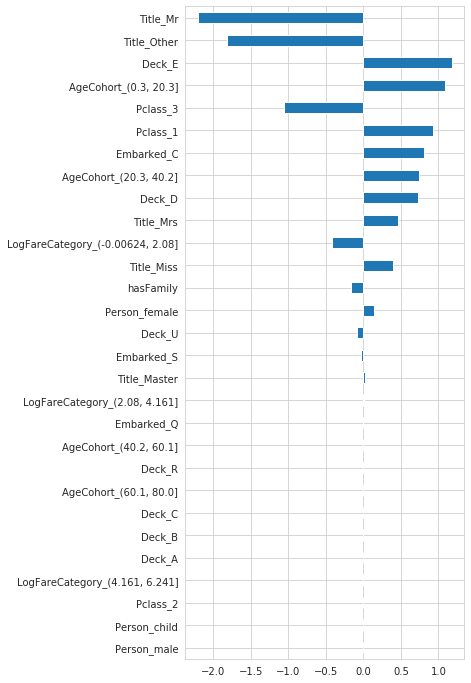

In [0]:
abs_coef_desc = abs(coef).sort_values()
coef = coef[abs_coef_desc.index]

coef.plot(kind="barh", figsize=(5, 12));

Select only important features

In [0]:
insigificant_features = coef.index[np.isclose(coef, 0)]

X_train_filtered = X_train.drop(columns=insigificant_features)
X_holdout_filtered = X_holdout.drop(columns=insigificant_features)

Retraing the models and estimate accuracy using a hold-out test sample

In [0]:
for name, clf in models.items():
    clf.fit(X_train_filtered, y_train)

scores_filtered = pd.Series({
    name: clf.score(X_holdout_filtered, y_holdout)
    for name, clf in models.items()
}, name="Accuracy")

scores_filtered

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Baseline                        0.511211
Support vector (C=1.00)         0.818386
Support vector (C=0.25)         0.795964
Support vector (C=4.00)         0.813901
Random Forest                   0.800448
Logistic Regression (C=1.00)    0.809417
Logistic Regression (C=0.25)    0.820628
Logistic Regression (C=4.00)    0.798206
1-nn euclidean                  0.681614
1-nn cosine                     0.744395
5-nn cosine                     0.771300
Name: Accuracy, dtype: float64

The difference is small

In [0]:
scores_filtered - scores

Baseline                        0.000000
Support vector (C=1.00)        -0.004484
Support vector (C=0.25)        -0.013453
Support vector (C=4.00)         0.008969
Random Forest                  -0.006726
Logistic Regression (C=1.00)    0.000000
Logistic Regression (C=0.25)    0.011211
Logistic Regression (C=4.00)   -0.002242
1-nn euclidean                 -0.094170
1-nn cosine                    -0.017937
5-nn cosine                    -0.044843
Name: Accuracy, dtype: float64

<br> <!-- Эта ячейка умышленно пуста -->